In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
#Total WA sales by calendar year
revenue = "Resources/2014_to_2016_WA_revenue.csv"
revenue_df = fy2015_df = pd.read_csv(revenue)

#Preview of revenue dataframe
revenue_df.tail()

,Date,Sales,Excise Tax Due,Sales (Shelf Price)
940,12/27/2016,3324831.99,752106.45,4076938.44
941,12/28/2016,3452036.10,797870.30,4249906.40
942,12/29/2016,4200475.36,859655.24,5060130.60
943,12/30/2016,5221889.13,1243811.86,6465700.99
944,12/31/2016,3713397.08,1354076.00,5067473.08


In [3]:
revenue_df = revenue_df[["Date", "Sales", "Excise Tax Due"]]

In [4]:
#Converted Date column to series with dtype datetime64[ns]
revenue_df["Date"] = pd.to_datetime(revenue_df["Date"])

revenue_df["Date"].tail()

C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


940   2016-12-27
941   2016-12-28
942   2016-12-29
943   2016-12-30
944   2016-12-31
Name: Date, dtype: datetime64[ns]

In [5]:
revenue_date_index = revenue_df.set_index("Date")
revenue_date_index.tail()

,Sales,Excise Tax Due
Date,,
2016-12-27,3324831.99,752106.45
2016-12-28,3452036.10,797870.30
2016-12-29,4200475.36,859655.24
2016-12-30,5221889.13,1243811.86
2016-12-31,3713397.08,1354076.00


In [6]:
#Grouped Sales and Excise Tax Due by month
revenue_date_sales = revenue_date_index.groupby(pd.Grouper(freq='M'))["Sales"].sum()
revenue_date_tax = revenue_date_index.groupby(pd.Grouper(freq='M'))["Excise Tax Due"].sum()

In [7]:
monthly_revenue_df = pd.DataFrame({"Sales Revenue": revenue_date_sales})
monthly_tax_df = pd.DataFrame({"Excise Tax": revenue_date_tax})

monthly_revenue_df = monthly_revenue_df.reset_index()
monthly_tax_df = monthly_tax_df.reset_index()

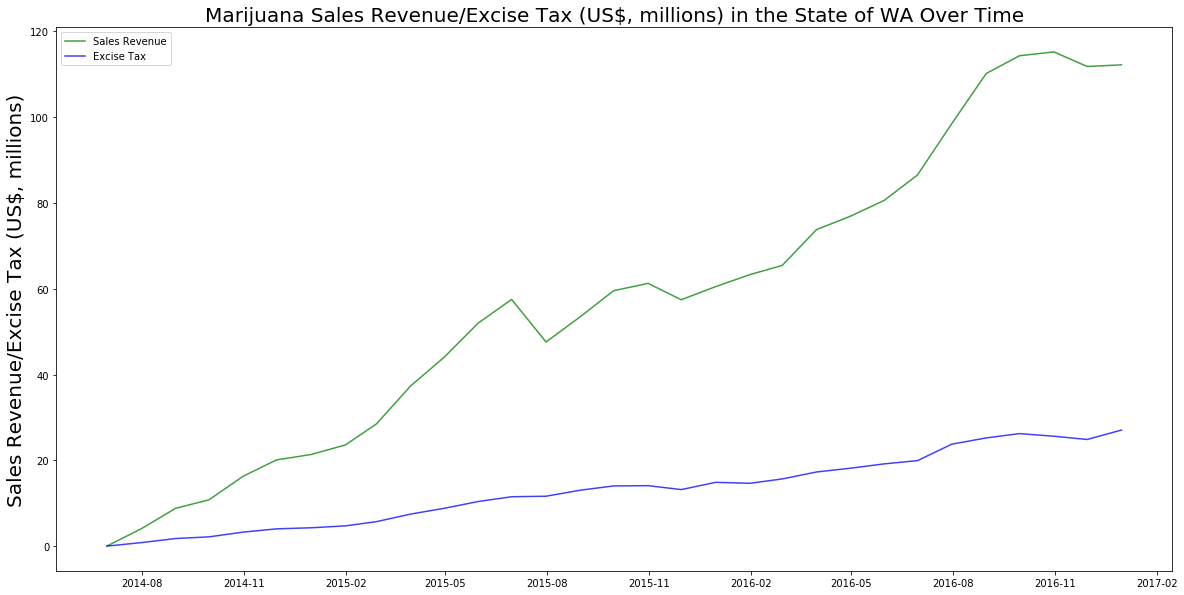

In [12]:
#Marijuana Sales Revenue Over Time Line Plot
dates_x_axis = monthly_revenue_df["Date"].tolist()
revenue_y_axis= (monthly_revenue_df["Sales Revenue"]/1000000).tolist()
tax_y_axis= (monthly_tax_df["Excise Tax"]/1000000).tolist()

sales_revenue_plot = plt.plot(dates_x_axis, revenue_y_axis, c = 'green', alpha=0.75, label = "Sales Revenue")
tax_plot = plt.plot(dates_x_axis, tax_y_axis, c = 'blue', alpha=0.75, label = "Excise Tax")
plt.legend(loc='upper left')

plt.title("Marijuana Sales Revenue/Excise Tax (US$, millions) in the State of WA Over Time", fontsize = 20)
plt.ylabel("Sales Revenue/Excise Tax (US$, millions)", fontsize = 20)

plt.rc('figure', figsize = (20,10))

plt.savefig("Marijuana Sales Revenue Over Time")

In [9]:
#Created separate dataframes for each year from 2014 to 2016
dates_2014 = (revenue_df['Date'] > "2013-12-31") & (revenue_df['Date'] <= "2014-12-31")
dates_2015 = (revenue_df['Date'] > "2014-12-31") & (revenue_df['Date'] <= "2015-12-31")
dates_2016 = (revenue_df['Date'] > "2015-12-31") & (revenue_df['Date'] <= "2016-12-31")

revenue_2014_df = revenue_df.loc[dates_2014]
revenue_2015_df = revenue_df.loc[dates_2015]
revenue_2016_df = revenue_df.loc[dates_2016]

revenue_2014_df.tail()

,Date,Sales,Excise Tax Due
209,2014-12-27,5.679374e+05,113587.4750
210,2014-12-28,5.139297e+05,102785.9475
211,2014-12-29,8.474707e+05,169494.1475
212,2014-12-30,6.672432e+05,133448.6300
213,2014-12-31,1.947348e+06,389469.6600


In [10]:
#Sum of Sales(Shelf Price) for each year to find total revenue per year
revenue_2014_sum = revenue_2014_df["Sales"].sum()
revenue_2015_sum = revenue_2015_df["Sales"].sum()
revenue_2016_sum = revenue_2016_df["Sales"].sum()

tax_2014_sum = revenue_2014_df["Excise Tax Due"].sum()
tax_2015_sum = revenue_2015_df["Excise Tax Due"].sum()
tax_2016_sum = revenue_2016_df["Excise Tax Due"].sum()

revenue_sum_df = pd.DataFrame({
    "Year": ["2014", "2015", "2016"],
    "Revenue": [revenue_2014_sum, revenue_2015_sum, revenue_2016_sum],
    "Excise Tax": [tax_2014_sum, tax_2015_sum, tax_2016_sum]})

revenue_sum_df["Shelf Price"] = revenue_sum_df["Revenue"] + revenue_sum_df["Excise Tax"]

revenue_sum_df

,Year,Revenue,Excise Tax,Shelf Price
0,2014,8.142992e+07,1.628598e+07,9.771591e+07
1,2015,5.828405e+08,1.294383e+08,7.122788e+08
2,2016,1.108915e+09,2.575871e+08,1.366502e+09


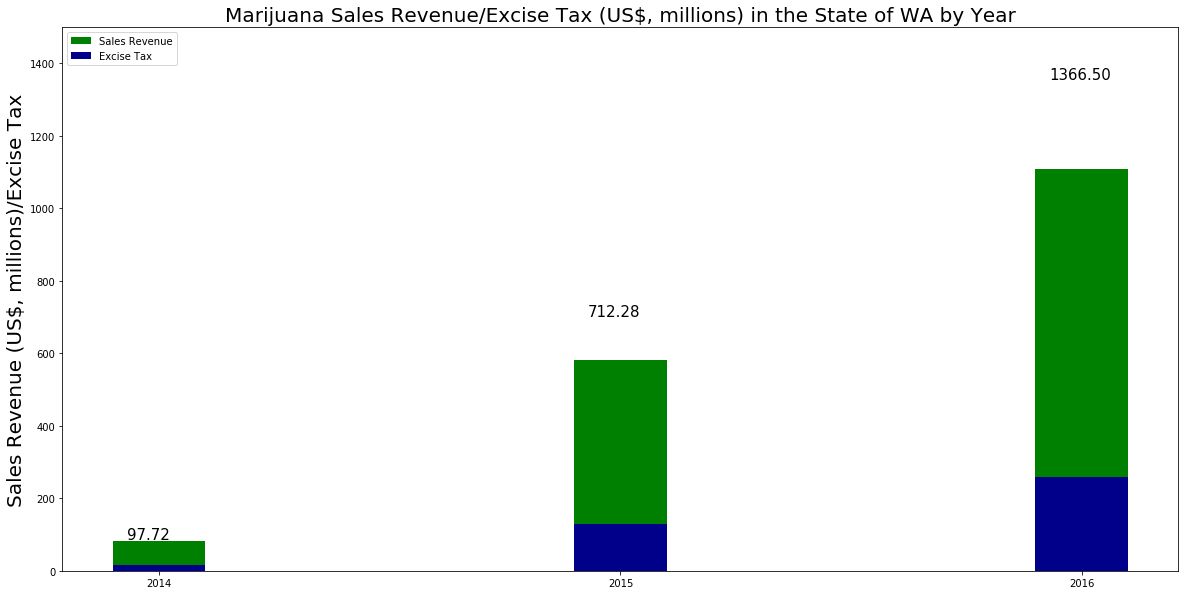

In [11]:
year = revenue_sum_df["Year"].tolist()
revenue_list = (revenue_sum_df["Revenue"]/1000000).tolist()
tax_list = (revenue_sum_df["Excise Tax"]/1000000).tolist()
shelf_price_list = (revenue_sum_df["Shelf Price"]/1000000).tolist()
x_axis = np.arange(len(year))

x = np.arange(len(year))

sales_revenue_plot = plt.bar(year, revenue_list, width = 0.2, color = "green", label = "Sales Revenue")
tax_plot = plt.bar(year, tax_list, width=0.2, color = "darkblue", label = "Excise Tax")

plt.title("Marijuana Sales Revenue/Excise Tax (US$, millions) in the State of WA by Year", fontsize=20)
plt.ylabel("Sales Revenue (US$, millions)/Excise Tax", fontsize=20)
plt.legend(loc='upper left')
plt.ylim(0,1500)

total_list = ["%.2f" % shelf_price for shelf_price in shelf_price_list]
for i in range(len(x_axis)):
    plt.text(x = x_axis[i]-0.07, y = shelf_price_list[i]-10, s = total_list[i], size = 15)

plt.rc('figure', figsize = (20,10))
    
plt.savefig("Marijuana Sales Revenue by Year")